<a href="https://colab.research.google.com/github/CromaAq/Analise-De-Acoes/blob/main/Analise_Acoes_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - **Importando Bibliotecas**

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
#import pandas_datareader.data as web
#yf.pdr_override()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-vxq4agkz
  Running command git clone -q https://github.com/quantopian/pyfolio /tmp/pip-req-build-vxq4agkz


In [4]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


# 2 - **Obtendo e tratando os dados**



In [5]:
#tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
#dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]

tickers = "ABEV3.SA ITSA4.SA WEGE3.SA USIM5.SA VALE3.SA ^BVSP"
dados_yahoo = yf.download(tickers=tickers, period="5y")['Adj Close']


[*********************100%***********************]  6 of 6 completed


In [6]:
dados_yahoo

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-04-17,15.529728,6.252383,3.573631,19.321209,6.127102,64335.0
2017-04-18,15.615719,6.304704,3.546761,18.743612,6.055525,64159.0
2017-04-19,15.564124,6.200061,3.546761,18.785875,6.001842,63407.0
2017-04-20,15.460936,6.147740,3.618413,19.757923,6.062682,63761.0
2017-04-24,15.503932,6.298162,3.609457,19.980343,6.137839,64389.0
...,...,...,...,...,...,...
2022-04-08,14.930000,10.270000,13.050000,95.150002,34.139999,118322.0
2022-04-11,15.200000,10.180000,12.950000,94.000000,32.549999,116953.0
2022-04-12,15.050000,10.080000,13.030000,93.370003,32.369999,116147.0


In [7]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-04-17,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-18,0.005537,0.008368,-0.007519,-0.029894,-0.011682,-0.002736
2017-04-19,-0.003304,-0.016598,0.000000,0.002255,-0.008865,-0.011721
2017-04-20,-0.006630,-0.008439,0.020202,0.051744,0.010137,0.005583
2017-04-24,0.002781,0.024468,-0.002475,0.011257,0.012397,0.009849
...,...,...,...,...,...,...
2022-04-08,-0.008632,0.000000,-0.036189,-0.020385,0.000586,-0.004543
2022-04-11,0.018084,-0.008763,-0.007663,-0.012086,-0.046573,-0.011570
2022-04-12,-0.009868,-0.009823,0.006178,-0.006702,-0.005530,-0.006892


In [8]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2017-04-17,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2017-04-18,1.005537,1.008368,0.992481,0.970106,0.988318,0.997264
2017-04-19,1.002215,0.991632,0.992481,0.972293,0.979556,0.985576
2017-04-20,0.995570,0.983264,1.012531,1.022603,0.989486,0.991078
2017-04-24,0.998339,1.007322,1.010025,1.034115,1.001752,1.000839
...,...,...,...,...,...,...
2022-04-08,0.961382,1.642574,3.651749,4.924640,5.571965,1.839154
2022-04-11,0.978768,1.628179,3.623766,4.865120,5.312462,1.817875
2022-04-12,0.969109,1.612185,3.646152,4.832513,5.283084,1.805347


In [9]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2017-04-17,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2017-04-18,10055.371804,10083.681629,9924.811659,9701.055630,9883.178794,49648.099515,-0.007038
2017-04-19,10022.148599,9916.317609,9924.811659,9722.929536,9795.562695,49381.770097,-0.005364
2017-04-20,9955.702802,9832.635217,10125.313457,10226.028388,9894.859436,50034.539301,0.013219
2017-04-24,9983.389318,10073.219614,10100.250899,10341.145273,10017.522909,50515.528013,0.009613
...,...,...,...,...,...,...,...
2022-04-08,9613.819615,16425.738570,36517.485314,49246.401585,55719.649028,167523.094113,-0.014397
2022-04-11,9787.679393,16281.793204,36237.656777,48651.199945,53124.621142,164082.950461,-0.020535
2022-04-12,9691.090696,16121.853569,36461.518539,48325.134814,52830.843930,163430.441548,-0.003977


# 3 - **Resultados**




Start date,2017-04-17
End date,2022-04-14
Total months,59
,Backtest
Annual return,26.873%
Cumulative returns,224.104%
Annual volatility,29.502%
Sharpe ratio,0.96
Calmar ratio,0.67
Stability,0.84
Max drawdown,-39.904%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.90,2020-02-19,2020-03-18,2020-07-17,108
1,24.26,2018-02-26,2018-06-21,2019-07-10,358
2,23.42,2021-07-28,2021-11-26,NaT,NaN
3,14.72,2019-07-10,2019-08-26,2019-11-07,87
4,12.02,2021-01-08,2021-01-29,2021-04-14,69


Stress Events,mean,min,max
New Normal,0.11%,-14.12%,11.50%


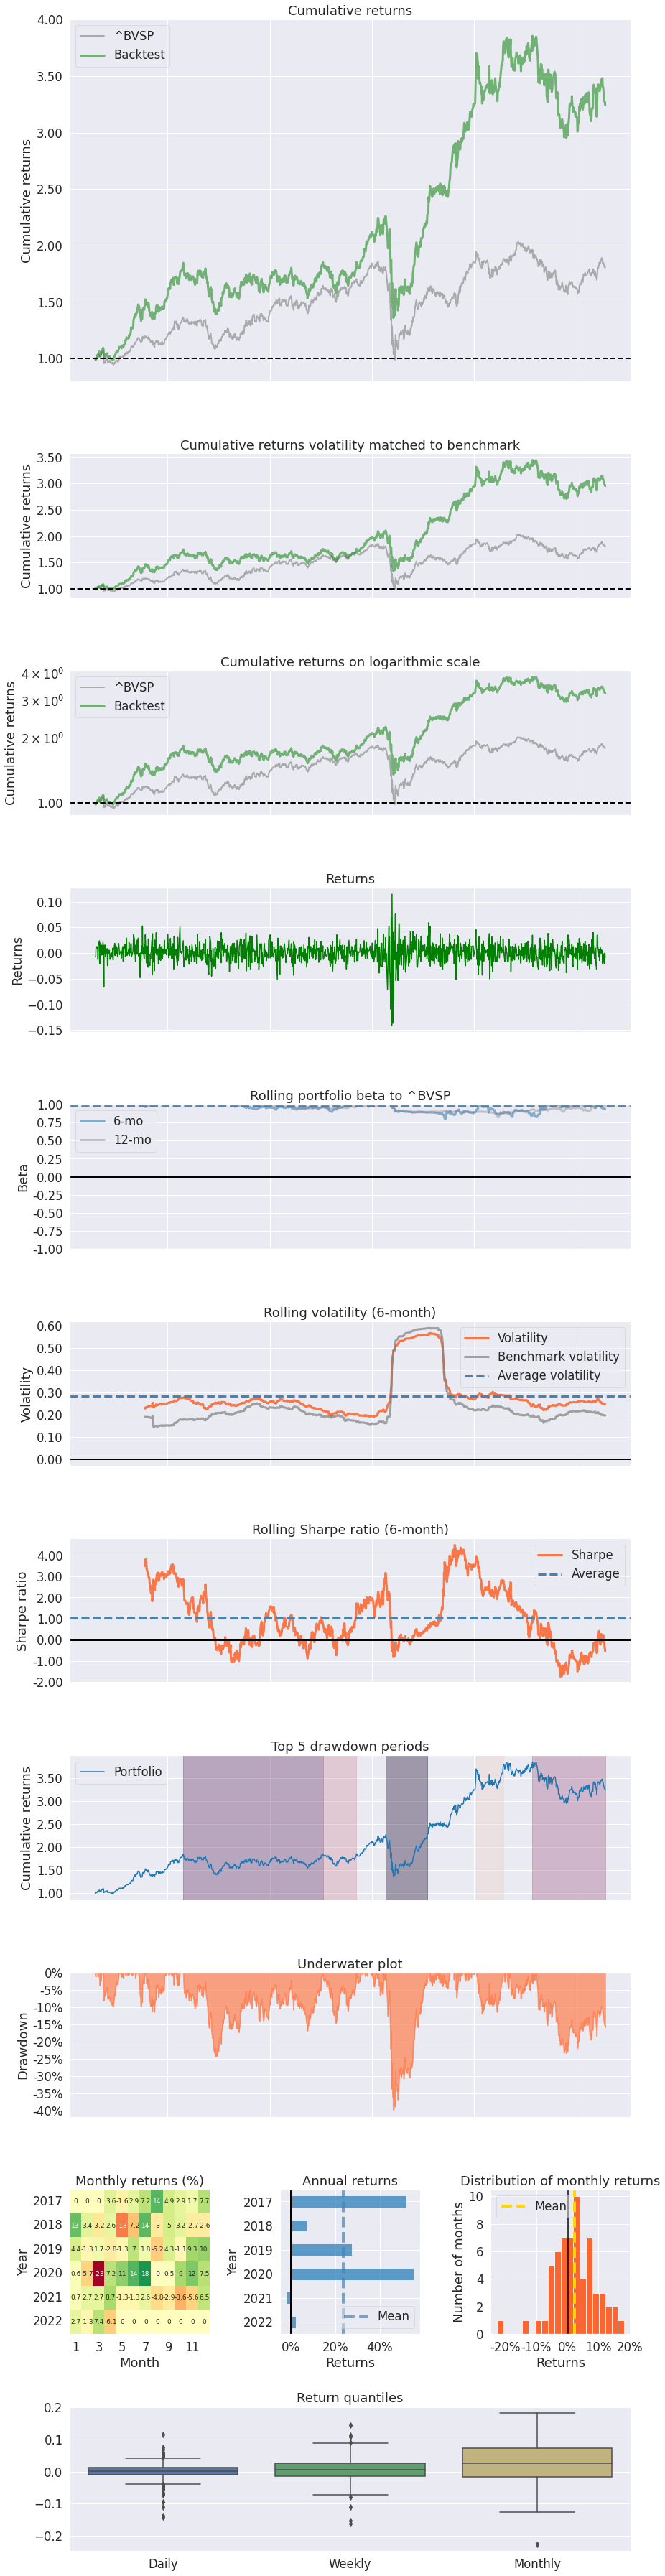

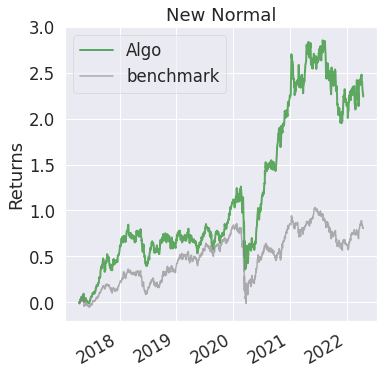

In [10]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


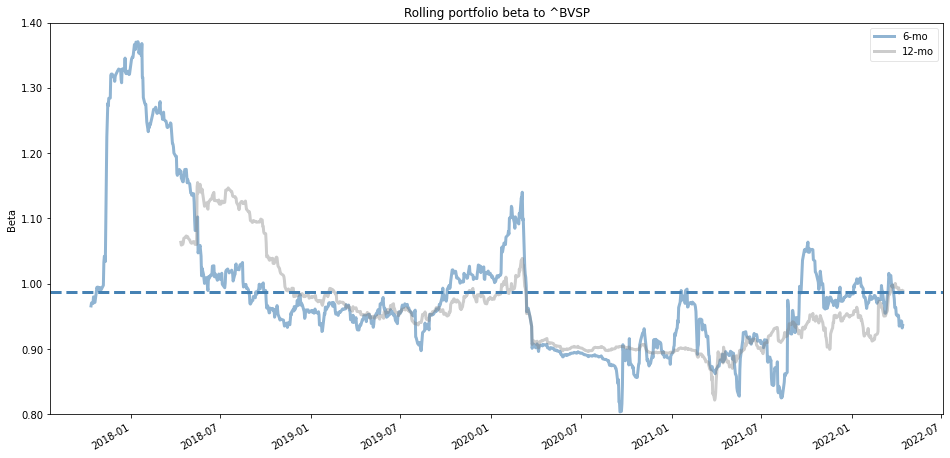

In [11]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));